In [1]:
import dataset
import torch
import torchvision
from PIL import Image,ImageOps
import os

ann_path = '/opt/ml/upstage_OCR/Data set/annotations/general_00_10.json'
ocr_url = "http://118.222.179.32:30000/ocr/"
image_root = '/opt/ml/upstage_OCR/Data set/real data/general'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

dset = dataset.WifiDataset_segmentation(ann_path, ocr_url, image_root, device)

  0%|          | 0/14 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
load images ...


100%|██████████| 14/14 [00:18<00:00,  1.36s/it]


In [6]:
idx = 0
x,y = dset[idx]
image_name =dset.img_names[idx][idx]['file_name']
image = Image.open(os.path.join(dset.img_root,image_name))
image = ImageOps.exif_transpose(image)
image = torchvision.transforms.ToTensor()(image).to(device)

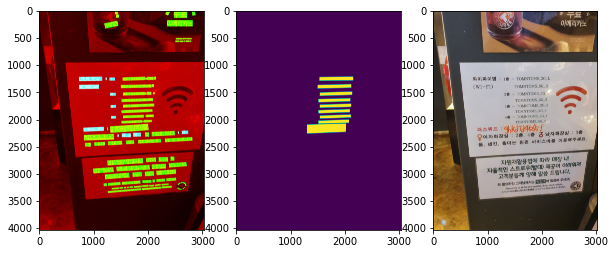

In [7]:
import matplotlib.pyplot as plt
import torchvision
t = torchvision.transforms.Compose(
    [torchvision.transforms.ToPILImage()]
)

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(t(x))

plt.subplot(1,3,2)
plt.imshow(t(y))

plt.subplot(1,3,3)
plt.imshow(t(y+image))

plt.show()